<a href="https://colab.research.google.com/github/ram1014/colab_files/blob/main/Practica21_263165.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 21 EDA 2 - Habermans Data
---
Alumno: Ramon Humberto Delgado Andrade

Matrícula: 263165

Profesor: Vicente García Jiménez

---

## EDA completo

### Descripción de los datos (medias, medianas, desviaciones estándar, etc.).

In [ ]:
#!/usr/bin/python
#import section

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
column_names = ['age', 'year', 'nodes', 'status']
df = pd.read_csv(url, header=None, names=column_names)

#cambiar columna status a categorica
df['status'] = df['status'].astype('category')
print(df['status'])
df['status'] = df['status'].cat.rename_categories({1: 'Survived 5+ years', 2: 'Died within 5 years'})
print(df['status'])





print(df.head(5))
print("="*80)

print(df.info())
print("="*80)

# Estadísticas descriptivas
print('El EDA de los datos es: ')
print(df.describe())
print("="*80)





0      1
1      1
2      1
3      1
4      1
      ..
301    1
302    1
303    1
304    2
305    2
Name: status, Length: 306, dtype: category
Categories (2, int64): [1, 2]
0        Survived 5+ years
1        Survived 5+ years
2        Survived 5+ years
3        Survived 5+ years
4        Survived 5+ years
              ...         
301      Survived 5+ years
302      Survived 5+ years
303      Survived 5+ years
304    Died within 5 years
305    Died within 5 years
Name: status, Length: 306, dtype: category
Categories (2, object): ['Survived 5+ years', 'Died within 5 years']
   age  year  nodes             status
0   30    64      1  Survived 5+ years
1   30    62      3  Survived 5+ years
2   30    65      0  Survived 5+ years
3   31    59      2  Survived 5+ years
4   31    65      4  Survived 5+ years
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   

#### Moda y Datos Faltantes

El dataset no contiene datos faltantes.

In [ ]:
#Obtenemos la moda de cada una de las columnas(el describe no la ofrece por si sola)
# Obtener la moda de cada columna
moda = df.mode().iloc[0]  # .iloc[0] toma solo el primer valor en caso de múltiples modas

# Mostrar la moda de cada columna
print("Moda de cada columna:")
print(moda)
print('\n')

# Verificar valores faltantes
print("Valores faltantes:")
print(df.isnull().sum())
df_nodes_counts = df['nodes'].value_counts()
print('='*100)
print("Count of positive axillary nodes detected")
print(df_nodes_counts)

Moda de cada columna:
age       52
year      58
nodes      0
status     1
Name: 0, dtype: int64


Valores faltantes:
age       0
year      0
nodes     0
status    0
dtype: int64
Count of positive axillary nodes detected
nodes
0     136
1      41
3      20
2      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
22      3
23      3
19      3
12      2
20      2
30      1
21      1
52      1
16      1
24      1
46      1
18      1
35      1
17      1
25      1
28      1
Name: count, dtype: int64


### Histogramas para las columnas numéricas.

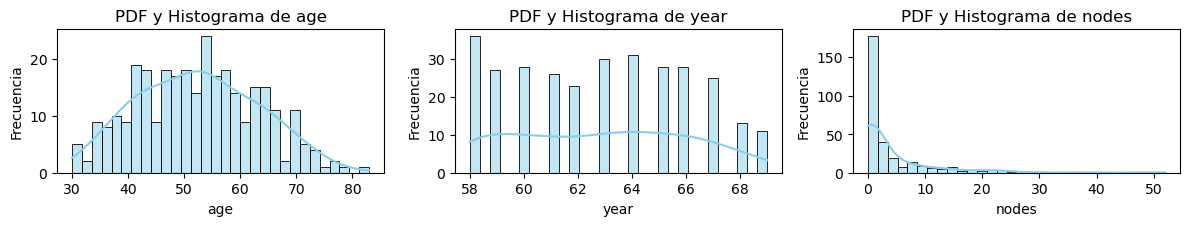

In [ ]:
# Crear una lista de las columnas del dataset
columns = df.select_dtypes(include=['int64']).columns

# Crear los gráficos de PDF e Histograma
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(5, 3, i)  # Ajustar la cantidad de subgráficos según el número de columnas
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'PDF y Histograma de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

### Gráficas de barras para la columna categórica status (supervivencia).

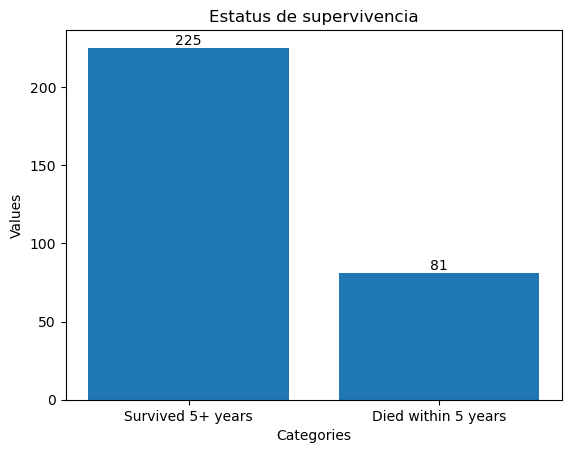

In [ ]:
#df['status'].value_counts().plot(kind='bar')
fig, ax = plt.subplots()
bars = ax.bar(df['status'].cat.categories, df['status'].value_counts())

ax.bar_label(bars, label_type='edge', color='black')
ax.set_title('Estatus de supervivencia')
ax.set_xlabel('Categories')
ax.set_ylabel('Values')

plt.show()


### Boxplots para identificar outliers en las columnas numéricas.

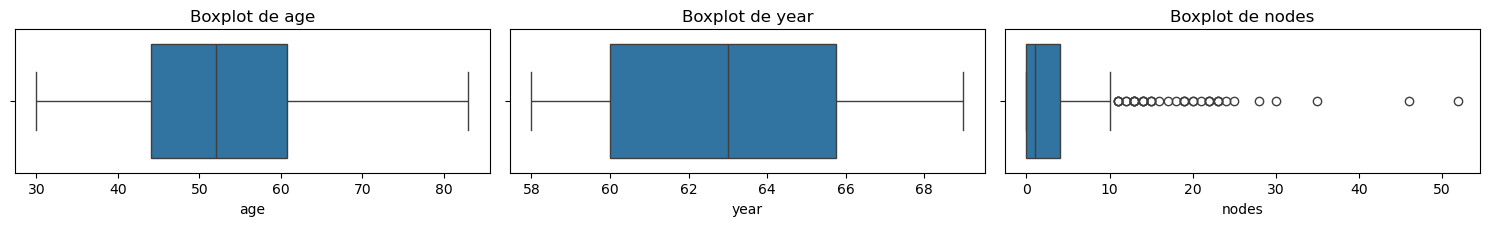

In [ ]:
# Seleccionar solo columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Crear boxplots para cada columna numérica
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)  # 2 filas, 4 columnas de subplots
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

### Matriz de correlación y mapa de calor.

Matriz de correlación:
            age      year     nodes
age    1.000000  0.089529 -0.063176
year   0.089529  1.000000 -0.003764
nodes -0.063176 -0.003764  1.000000


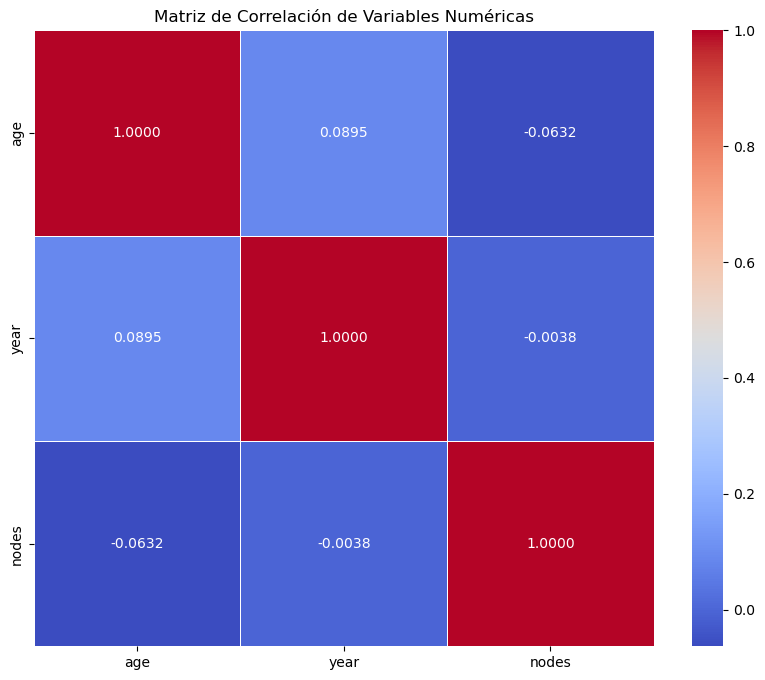

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
corr_matrix = numeric_columns.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(corr_matrix)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.4f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

### Pairplot para visualizar relaciones entre variables numéricas.

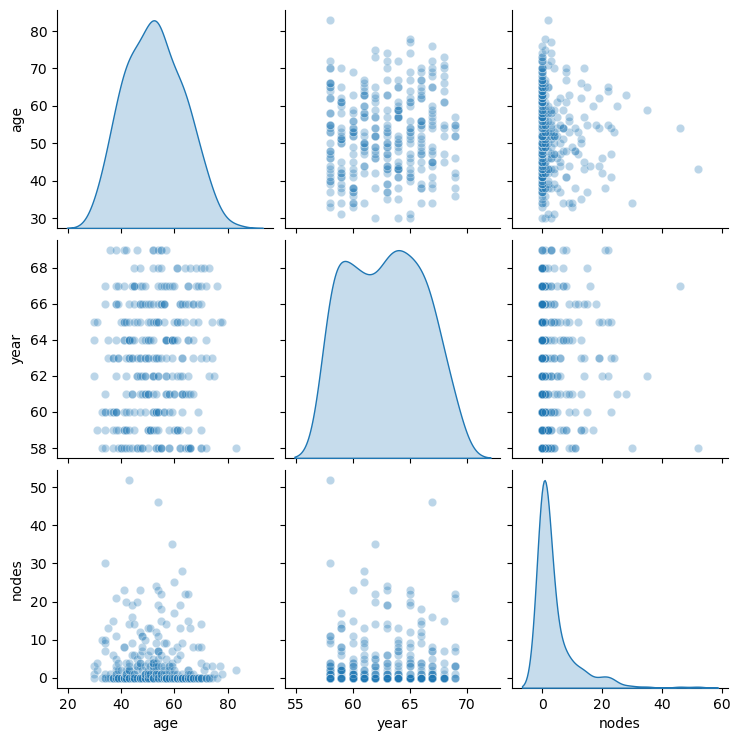

In [ ]:
# Seleccionar solo las columnas numéricas
numerical_cols = df.select_dtypes(include=['int64']).columns

# Crear un scatterplot para todas las combinaciones de variables numéricas
sns.pairplot(df[numerical_cols], plot_kws={'alpha': 0.3}, diag_kind='kde')

# Mostrar el gráfico
plt.show()

### Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot para las columnas numéricas.

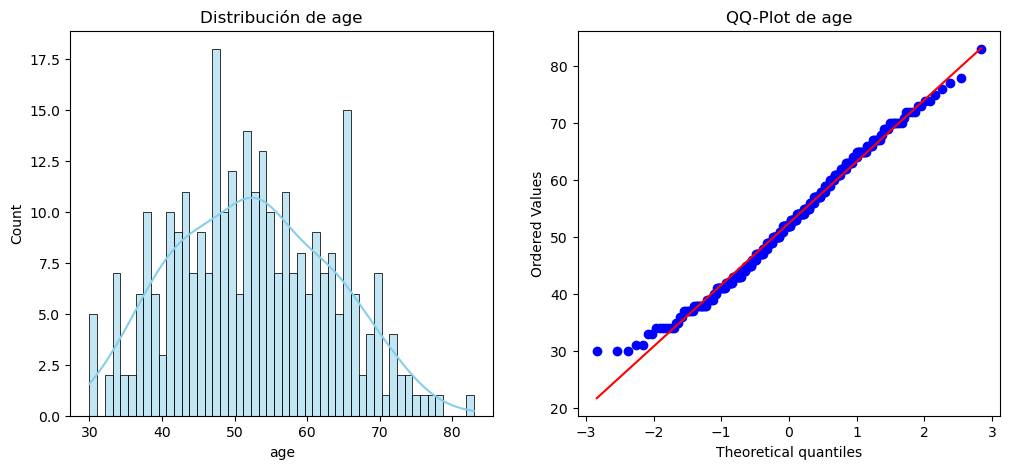


Pruebas de normalidad para la columna: age
Shapiro-Wilk Test: p-valor = 0.02605
Kolmogorov-Smirnov Test: p-valor = 0.46980
Anderson-Darling Test: Estadístico = 0.73156
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos parecen normales.
  Al nivel de significancia 2.5%, los datos parecen normales.
  Al nivel de significancia 1.0%, los datos parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00780


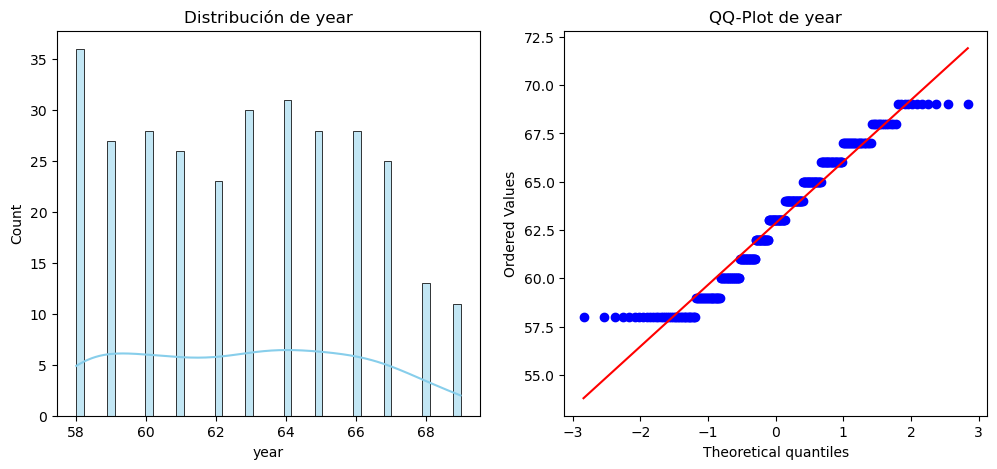


Pruebas de normalidad para la columna: year
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00158
Anderson-Darling Test: Estadístico = 4.31374
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


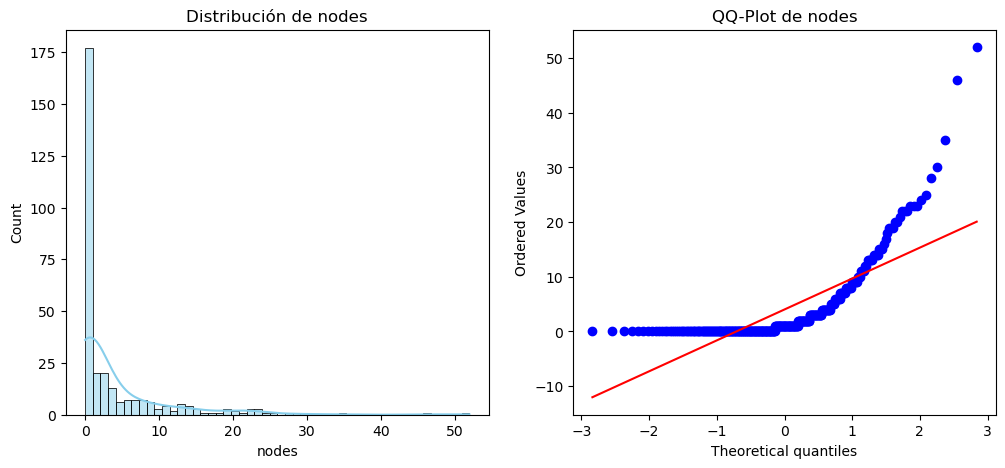


Pruebas de normalidad para la columna: nodes
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 39.68662
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


In [ ]:
# Seleccionar solo columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Función para realizar pruebas de normalidad
def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad para la columna: {column_name}")

    # Prueba de Shapiro-Wilk
    shapiro_test = stats.shapiro(data.sample(min(5000, len(data)), random_state=42))  # Muestra de 5000 para evitar problemas de cómputo
    print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")

    # Prueba de Kolmogorov-Smirnov
    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")

    # Prueba de Anderson-Darling
    anderson_test = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
    for i in range(len(anderson_test.critical_values)):
        sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
        if anderson_test.statistic < cv:
            print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
        else:
            print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")

    # Prueba de D'Agostino-Pearson
    dagostino_test = stats.normaltest(data)
    print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:.5f}")

# Función para graficar histograma y QQ-Plot
def plot_distribution(data, column_name):
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=50, kde=True, color="skyblue")
    plt.title(f"Distribución de {column_name}")

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.show()

# Aplicar pruebas de normalidad y gráficos a cada columna numérica
for column in numeric_columns:
    data = df[column]
    plot_distribution(data, column)
    normality_tests(data, column)